# Analyzing the Philadelphia Data Science Scene with Python

# Instructions
* The latest version of this notebook can always be found and viewed online [here](http://nbviewer.ipython.org/github/mdbecker/daa_philly_2015/blob/master/DataPhilly_Analysis.ipynb). **It's strongly recommended that you view the online version of this document**.
* Instructions for setting up Jupyter Notebook and the required libraries can be found online [here](https://github.com/mdbecker/daa_philly_2015/blob/master/README.md).
* The repo for this project can be found and forked [here](https://github.com/mdbecker/daa_philly_2015/).

# DataPhilly
<img src="dataphilly.jpeg" width="70%" />

[DataPhilly](www.meetup.com/DataPhilly) is a local data meetup group I started back in 2012. I had attended a few data science conferences and I was really disappointed about the lack of a local meetup group for people interested in data science. And so DataPhilly was born!

# Jupyter Notebook
The Jupyter Notebook is a web application that allows you to create and share documents that contain live code, equations, visualizations and explanatory text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, machine learning and much more.

<img src="jupyterpreview.png" width="70%" />

Through Jupyter's kernel and messaging architecture, the Notebook allows code to be run in a range of different programming languages.  For each notebook document that a user opens, the web application starts a kernel that runs the code for that notebook. Each kernel is capable of running code in a single programming language and there are kernels available in the following languages

* Python(https://github.com/ipython/ipython)
* Julia (https://github.com/JuliaLang/IJulia.jl)
* R (https://github.com/takluyver/IRkernel)
* Ruby (https://github.com/minrk/iruby)
* Haskell (https://github.com/gibiansky/IHaskell)
* Scala (https://github.com/Bridgewater/scala-notebook)
* node.js (https://gist.github.com/Carreau/4279371)
* Go (https://github.com/takluyver/igo)

The default kernel runs Python code. The notebook provides a simple way for users to pick which of these kernels is used for a given notebook.

**Jupyter examples and tutorials can be found in the Jupyter github repo [here](https://github.com/jupyter/notebook/blob/master/docs/source/examples/Notebook/Examples%20and%20Tutorials%20Index.ipynb).**

# The task
The task I'll be walking you through today will demonstrate how to use Python for exploratory data analysis. The dataset I'll use is one I created by querying the Meetup API for the DataPhilly meetup. I'll walk you through using Jupyter notebook (The webapp we're using now), Pandas (an excel like tool for data exploration) and scikit-learn (a Python machine learning library) to explore the DataPhilly dataset. I won't go in depth into these tools but my hope is that you'll leave my talk wanting to learn more about using Python for exploratory data analysis and that you'll learn some interesting things about DataPhilly in the process.

## Initializing our environment

First let's start off by initializing our environment
* ``%matplotlib inline`` initializes [matplotlib](http://matplotlib.org/) so that we can display graphs and charts in our notebook.
* ``import seaborn as sns`` imports [seaborn](https://web.stanford.edu/~mwaskom/software/seaborn/) a graphing library built on top of matplotlib.
* ``import pandas as pd`` imports [pandas](http://pandas.pydata.org/) a tool I'll explain in the next section.

*Hint: If you've installed Jupyter Notebook and you're running this on your machine, you can use the run button <i class="fa-step-forward fa"></i> in the toolbar at the top of the page to execute each cell*

Click on the cell above and the cell below. You'll notice that the cell above is [Markdown](https://daringfireball.net/projects/markdown/). You can edit it by double clicking on it. The cell below contains Python code which can be modified and executed. If the code has any output it will be printed out below the cell with **<font color="darkred">Out [n]:</font>** in front of it.

In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
from matplotlib import rcParams

# Modify aesthetics for visibility during presentation
sns.set_style('darkgrid', {'axes.facecolor': '#C2C2C8'})
sns.set_palette('colorblind')

# Make everything bigger for visibility during presentation
rcParams['figure.figsize'] = 20, 10
rcParams['axes.titlesize'] = 'xx-large'
rcParams['axes.labelsize'] = 'x-large'
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
rcParams['legend.fontsize'] = 'xx-large'
rcParams['lines.linewidth'] = 4.0
rcParams['grid.linewidth'] = 2.0

# Hide warnings in the notebook
import warnings
warnings.filterwarnings('ignore')

## Pandas

<img src="pandas_logo.png" width="50%" />

Pandas is a library that provides data analysis tools for the Python programming language. You can think of it as Excel on steroids, but in Python.

To start off, I've used the [meetup API](http://www.meetup.com/meetup_api/docs/) to gather a bunch of data on members of the [DataPhilly meetup group](http://www.meetup.com/DataPhilly/). First let's start off by looking at the events we've had over the past few years. I've loaded the data into a pandas ``DataFrame`` and stored it in the file ``events.pkl``. A ``DataFrame`` is a table similar to an Excel spreadsheet. Let's load it and see what it looks like:

## DataPhilly events dataset

In [2]:
events_df = pd.read_pickle('events.pkl')
events_df = events_df.sort_values(by='time')
events_df

created                                               name  \
0   1351948193000                                     Meet and greet   
1   1357781071000  DataPhilly January 2013 Meetup - An Introducti...   
2   1359732939000  DataPhilly February 2013 Meetup - Data Science...   
3   1361647778000  DataPhilly March 2013 Meetup - Data Analysis u...   
4   1362506708000  DataPhilly April 2013 Meetup - Machine Learnin...   
5   1369104714000     DataPhilly June 2013 - Hadoop: BigSheets & Pig   
6   1375999505000       DataPhilly August 2013 - Data Science with R   
7   1378332108000         DataPhilly September 2013 - Data Storytime   
8   1381360216000  DataPhilly October 2013 - Data Science Tools a...   
9   1383762778000        DataPhilly November 2013 - Data in Practice   
10  1389631621000  DataPhilly January 2014 - Two Hours of Lightni...   
11  1393608501000  DataPhilly March 2014 - Interactive Data Visua...   
12  1396956902000                DataPhilly April 2014: Art and Data   
13  1400001749000                DataPhilly May 2014: Data Discovery   
14  1410488369000                              Explore All the Data!   
15  1414103507000                              Explore All the Data!   
16  1417659431000                         DataPhilly - December 2014   
17  1421280214000       DataPhilly & GeoPhilly: Open Data Day Meetup   
18  1423955223000                           DataPhilly: March Meetup   
19  1426720048000        DataPhilly: April; Philly Tech Week Edition   
20  1442763491000                                 DataPhilly October   

                                       rating           time  waitlist_count  \
0                {u'count': 3, u'average': 5}  1352934000000               0   
1    {u'count': 6, u'average': 4.17000007629}  1359588600000               0   
2                {u'count': 5, u'average': 5}  1361316600000               0   
3                {u'count': 8, u'average': 5}  1364423400000               0   
4    {u'count': 7, u'average': 4.57000017166}  1366151400000               2   
5                {u'count': 4, u'average': 3}  1370471400000               5   
6   {u'count': 11, u'average': 4.55000019073}  1377037800000               0   
7                {u'count': 9, u'average': 5}  1380234600000               0   
8   {u'count': 11, u'average': 4.73000001907}  1382565600000               0   
9    {u'count': 3, u'average': 4.67000007629}  1384815600000               0   
10   {u'count': 6, u'average': 4.82999992371}  1391036400000               0   
11   {u'count': 9, u'average': 4.67000007629}  1394661600000               0   
12            {u'count': 4, u'average': 4.75}  1397685600000               0   
13               {u'count': 7, u'average': 5}  1400709600000               0   
14               {u'count': 2, u'average': 5}  1412719200000               0   
15               {u'count': 3, u'average': 4}  1415314800000               0   
16               {u'count': 5, u'average': 5}  1418770800000               2   
17             {u'count': 4, u'average': 4.5}  1424386800000              83   
18   {u'count': 3, u'average': 4.67000007629}  1426802400000               0   
19               {u'count': 9, u'average': 5}  1429221600000              19   
20   {u'count': 6, u'average': 4.82999992371}  1445551200000               7   

    yes_rsvp_count         id  
0               17   89769502  
1               61   98833672  
2               47  102502622  
3               62  106043892  
4               54  107740582  
5               41  120425212  
6               77  133803672  
7               64  138415912  
8               50  144769822  
9               67  149515412  
10              69  160323532  
11              69  168747852  
12              39  175993712  
13              60  182860422  
14              44  206754182  
15              41  215265722  
16              68  219055217  
17              57  219840555  
18             114  220526799  
19             115  2212

You can access values in a ``DataFrame`` column like this:

In [3]:
events_df['yes_rsvp_count']

0      17
1      61
2      47
3      62
4      54
5      41
6      77
7      64
8      50
9      67
10     69
11     69
12     39
13     60
14     44
15     41
16     68
17     57
18    114
19    115
20    139
Name: yes_rsvp_count, dtype: int64

You can access a row of a ``DataFrame`` using ``iloc``:

In [4]:
events_df.iloc[4]

created                                               1362506708000
name              DataPhilly April 2013 Meetup - Machine Learnin...
rating                     {u'count': 7, u'average': 4.57000017166}
time                                                  1366151400000
waitlist_count                                                    2
yes_rsvp_count                                                   54
id                                                        107740582
Name: 4, dtype: object

We can view the first few rows using the ``head`` method:

In [5]:
events_df.head()

created                                               name  \
0  1351948193000                                     Meet and greet   
1  1357781071000  DataPhilly January 2013 Meetup - An Introducti...   
2  1359732939000  DataPhilly February 2013 Meetup - Data Science...   
3  1361647778000  DataPhilly March 2013 Meetup - Data Analysis u...   
4  1362506708000  DataPhilly April 2013 Meetup - Machine Learnin...   

                                     rating           time  waitlist_count  \
0              {u'count': 3, u'average': 5}  1352934000000               0   
1  {u'count': 6, u'average': 4.17000007629}  1359588600000               0   
2              {u'count': 5, u'average': 5}  1361316600000               0   
3              {u'count': 8, u'average': 5}  1364423400000               0   
4  {u'count': 7, u'average': 4.57000017166}  1366151400000               2   

   yes_rsvp_count         id  
0              17   89769502  
1              61   98833672  
2              47  102502622  
3              62  106043892  
4              54  107740582

And similarly the last few using ``tail``:

In [6]:
events_df.tail(3)

created                                         name  \
18  1423955223000                     DataPhilly: March Meetup   
19  1426720048000  DataPhilly: April; Philly Tech Week Edition   
20  1442763491000                           DataPhilly October   

                                      rating           time  waitlist_count  \
18  {u'count': 3, u'average': 4.67000007629}  1426802400000               0   
19              {u'count': 9, u'average': 5}  1429221600000              19   
20  {u'count': 6, u'average': 4.82999992371}  1445551200000               7   

    yes_rsvp_count         id  
18             114  220526799  
19             115  221245827  
20             139  225488147

We can see that the ``yes_rsvp_count`` contains the number of people who RSVPed yes for each event. First let's look at some basic statistics:

In [7]:
yes_rsvp_count = events_df['yes_rsvp_count']
yes_rsvp_count.sum(), yes_rsvp_count.mean(), yes_rsvp_count.min(), yes_rsvp_count.max()

(1355, 64.523809523809518, 17, 139)

When we access a single column of the ``DataFrame`` like this we get a ``Series`` object which is just a 1-dimensional version of a ``DataFrame``.

In [8]:
type(yes_rsvp_count)

pandas.core.series.Series

We can use the built-in ``describe`` method to print out a lot of useful stats in a nice tabular format:

In [9]:
yes_rsvp_count.describe()

count     21.000000
mean      64.523810
std       28.212797
min       17.000000
25%       47.000000
50%       61.000000
75%       69.000000
max      139.000000
Name: yes_rsvp_count, dtype: float64

Next I'd like to graph the number of RSVPs over time to see if there are any interesting trends. To do this let's first ``sum`` the ``waitlist_count`` and ``yes_rsvp_count`` columns and make a new column called ``total_RSVP_count``.

In [10]:
events_df['total_RSVP_count'] = events_df['waitlist_count'] + events_df['yes_rsvp_count']
events_df['total_RSVP_count']

0      17
1      61
2      47
3      62
4      56
5      46
6      77
7      64
8      50
9      67
10     69
11     69
12     39
13     60
14     44
15     41
16     70
17    140
18    114
19    134
20    146
Name: total_RSVP_count, dtype: int64

We can plot these values using the ``plot`` method

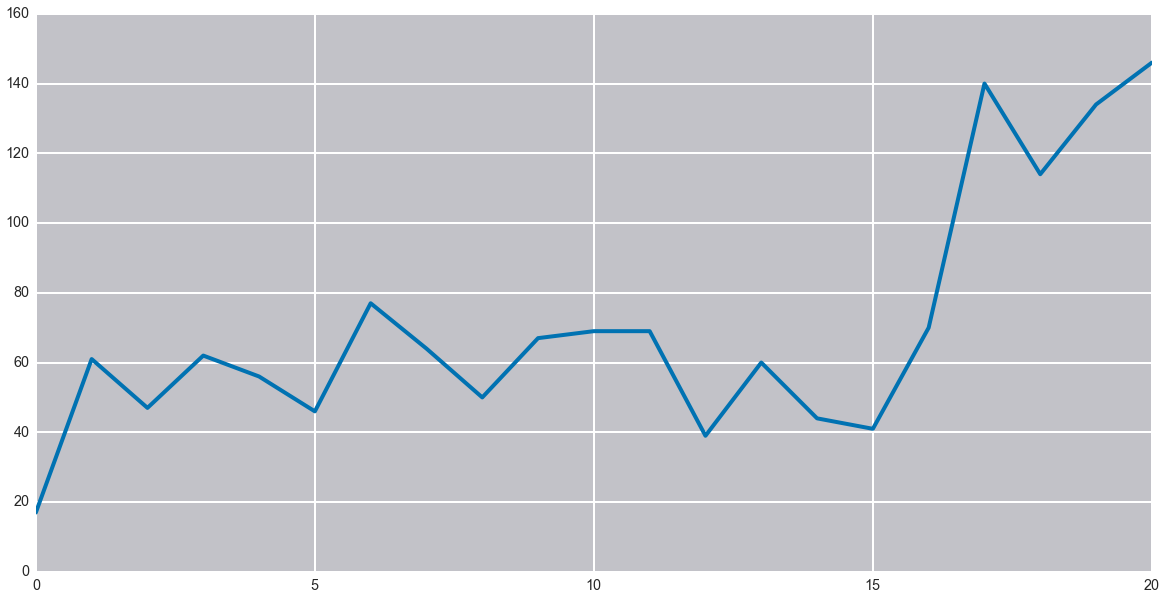

In [11]:
events_df['total_RSVP_count'].plot()

The plot method utilizes the ``matplotlib`` library behind the scenes to draw the plot. This is interesting, but it would be nice to have the dates of the meetups on the X-axis of the plot.

To accomplish this, let's convert the ``time`` field from a unix epoch timestamp to a python ``datetime`` utilizing the ``apply`` method and a function.

In [12]:
events_df.head(2)

created                                               name  \
0  1351948193000                                     Meet and greet   
1  1357781071000  DataPhilly January 2013 Meetup - An Introducti...   

                                     rating           time  waitlist_count  \
0              {u'count': 3, u'average': 5}  1352934000000               0   
1  {u'count': 6, u'average': 4.17000007629}  1359588600000               0   

   yes_rsvp_count        id  total_RSVP_count  
0              17  89769502                17  
1              61  98833672                61

In [13]:
import datetime
def get_datetime_from_epoch(epoch):
    return datetime.datetime.fromtimestamp(epoch/1000.0)

In [14]:
events_df['time'] = events_df['time'].apply(get_datetime_from_epoch)
events_df['time']

0    2012-11-14 18:00:00
1    2013-01-30 18:30:00
2    2013-02-19 18:30:00
3    2013-03-27 18:30:00
4    2013-04-16 18:30:00
5    2013-06-05 18:30:00
6    2013-08-20 18:30:00
7    2013-09-26 18:30:00
8    2013-10-23 18:00:00
9    2013-11-18 18:00:00
10   2014-01-29 18:00:00
11   2014-03-12 18:00:00
12   2014-04-16 18:00:00
13   2014-05-21 18:00:00
14   2014-10-07 18:00:00
15   2014-11-06 18:00:00
16   2014-12-16 18:00:00
17   2015-02-19 18:00:00
18   2015-03-19 18:00:00
19   2015-04-16 18:00:00
20   2015-10-22 18:00:00
Name: time, dtype: datetime64[ns]

Next let's make the ``time`` column the index of the ``DataFrame`` using the ``set_index`` method and then re-``plot`` our data.

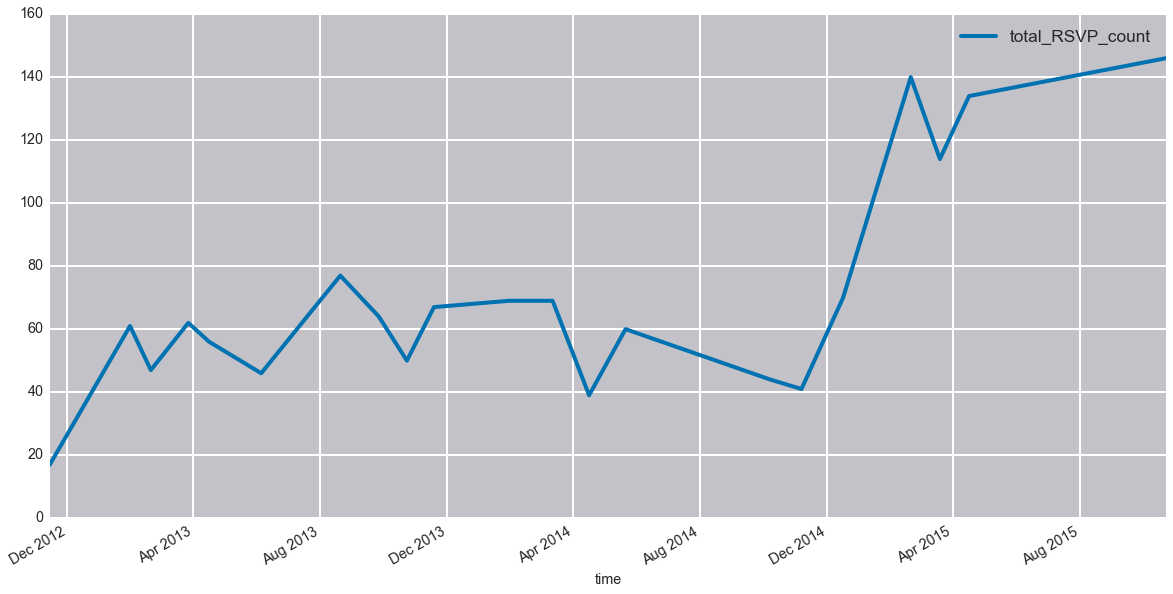

In [15]:
events_df.set_index('time', inplace=True)
events_df[['total_RSVP_count']].plot()

We can also easily plot multiple columns on the same plot.

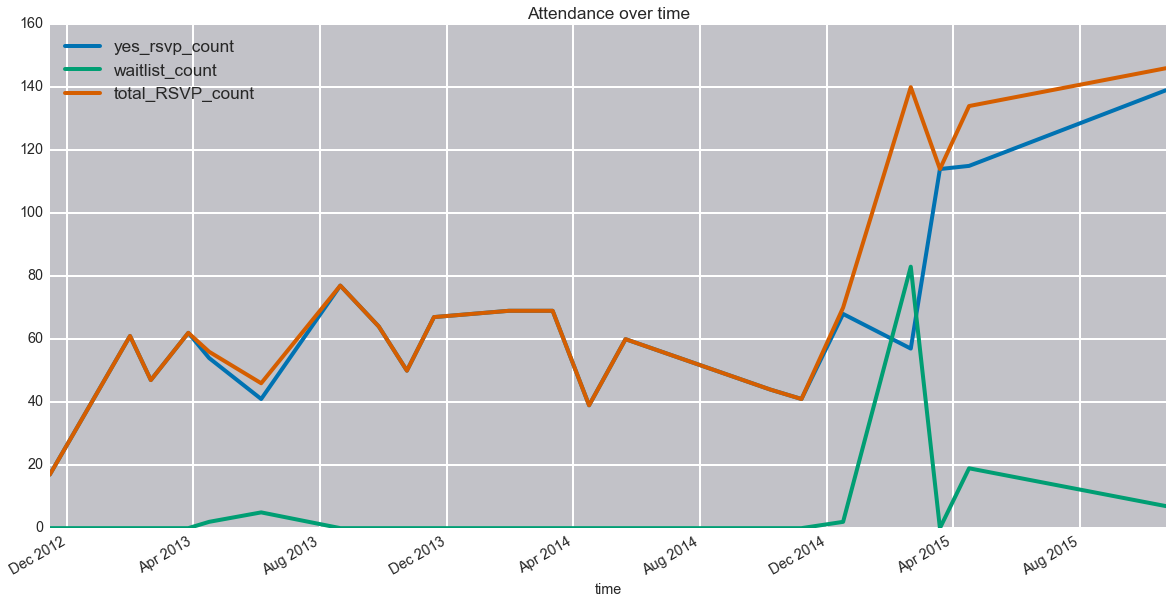

In [16]:
all_rsvps = events_df[['yes_rsvp_count', 'waitlist_count', 'total_RSVP_count']]
all_rsvps.plot(title='Attendance over time')

## DataPhilly members dataset

Alright so I'm seeing some interesting trends here. Let's take a look at something different.

The Meetup API also provides us access to member info. Let's have a look at the data we have available:

In [17]:
members_df = pd.read_pickle('members.pkl')
for column in ['joined', 'visited']:
    members_df[column] = members_df[column].apply(get_datetime_from_epoch)
members_df.head(3)

anon_id anon_name                                            bio  \
0        0     James                                            NaN   
1        1     Vijay  java software developer in center city philly   
2        2    Justin                                            NaN   

           city country gender      hometown              joined    lat  \
0  Philadelphia      us   male  Philadelphia 2015-10-10 21:43:33  39.94   
1  Philadelphia      us   male  Philadelphia 2013-11-22 22:32:04  39.96   
2  Philadelphia      us   male           NaN 2015-06-10 16:18:43  40.00   

     lon  membership_count state  \
0 -75.23                 0    PA   
1 -75.20                 0    PA   
2 -75.14                63    PA   

                                              topics             visited  
0  [{u'name': u'Poker', u'urlkey': u'poker', u'id... 2015-10-10 21:43:33  
1                                                 [] 2015-04-13 20:20:24  
2  [{u'name': u'Extreme Programming', u'urlkey': ... 2015-10-22 15:42:23

You'll notice that I've anonymized the meetup member_id and the member's name. I've also used the python module [``SexMachine``](https://pypi.python.org/pypi/SexMachine/) to infer members gender based on their first name. I ran SexMachine on the original names before I anonymized them. Let's have a closer look at the gender breakdown of our members:

In [18]:
gender_counts = members_df['gender'].value_counts()
gender_counts

male             716
andy             257
female           175
mostly_male       91
mostly_female     35
Name: gender, dtype: int64

Next let's use the ``hist`` method to plot a histogram of ``membership_count``. This is the number of groups each member is in.

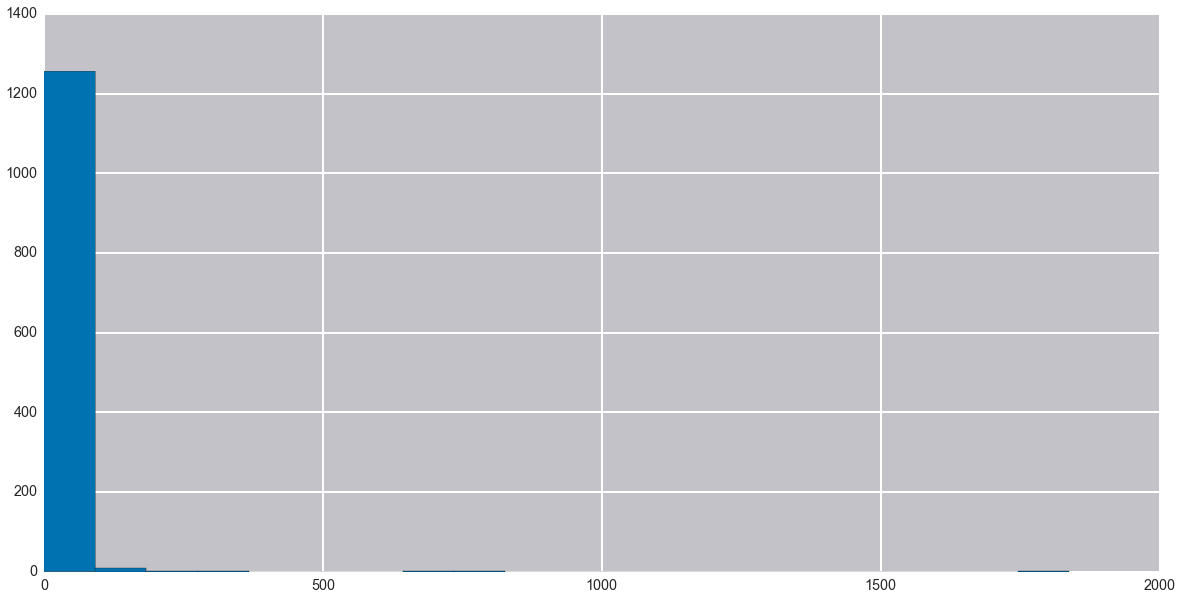

In [19]:
members_df['membership_count'].hist(bins=20)

Something looks odd here let's check out the ``value_counts``:

In [20]:
members_df['membership_count'].value_counts().head()

0    124
2    105
1     96
3     86
5     77
Name: membership_count, dtype: int64

Okay so most members are members of 0 meetup groups?! This seems odd! I did a little digging and came up with the answer; members can set their membership details to be private, and then this value will be zero. Let's filter out these members and recreate the histogram.

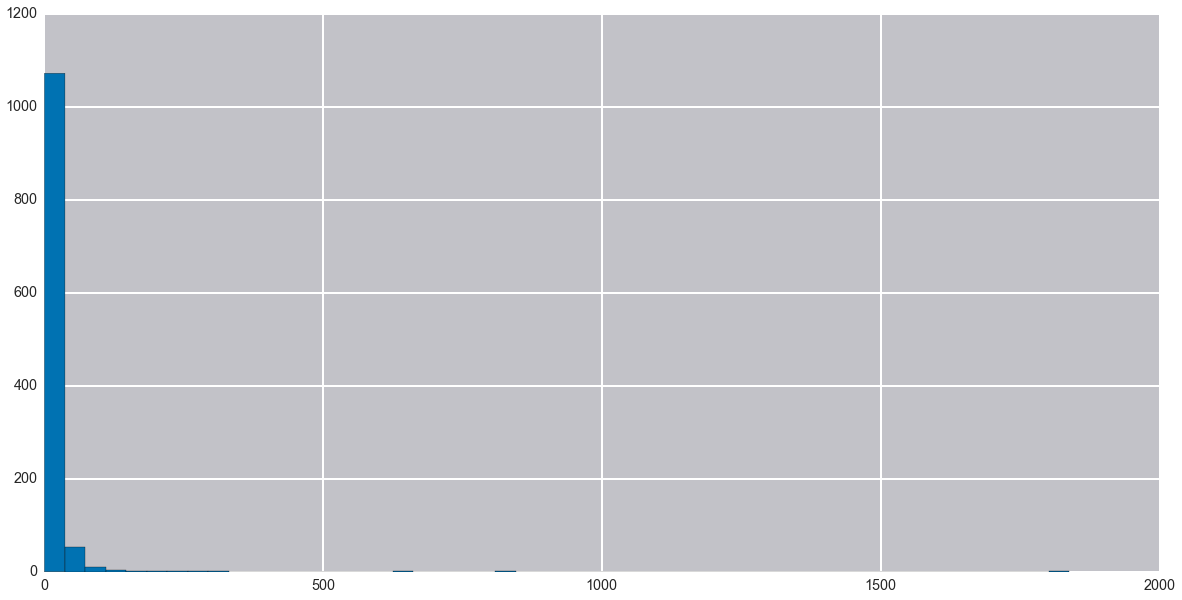

In [21]:
members_df_non_zero = members_df[members_df['membership_count'] != 0]
members_df_non_zero['membership_count'].hist(bins=50)

Okay so most members are only members of a few meetup groups. There's some outliers that are pretty hard to read, let's try plotting this on a logarithmic scale to see if that helps:

(0, 500)

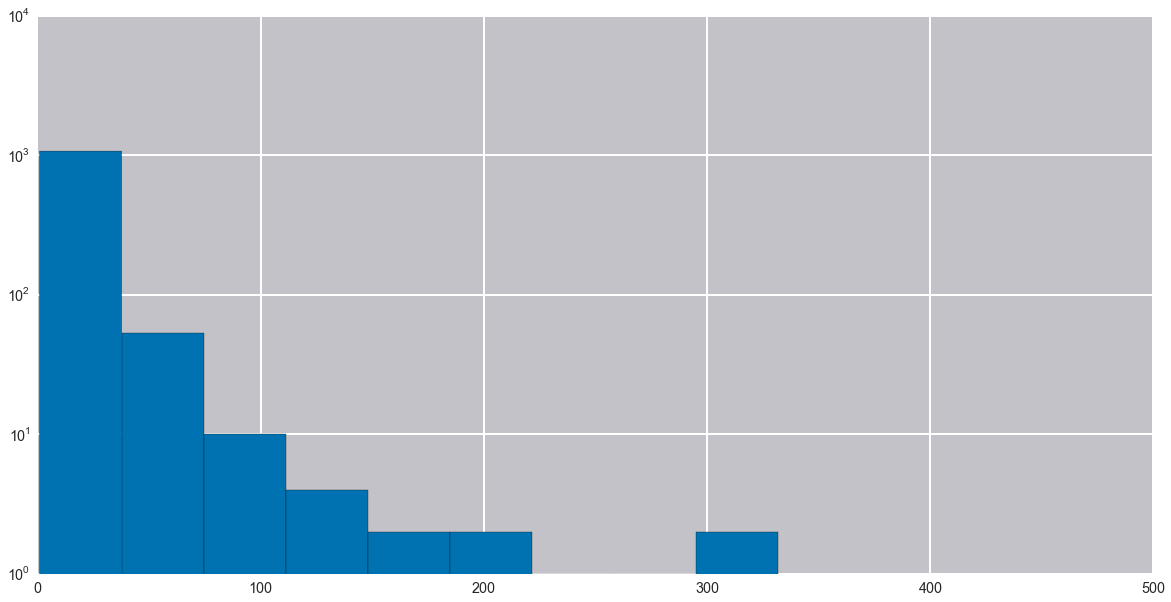

In [22]:
ax = members_df_non_zero['membership_count'].hist(bins=50)
ax.set_yscale('log')
ax.set_xlim(0, 500)

Let's use a ``mask`` to filter out the outliers so we can dig into them a little further:

In [23]:
all_the_meetups = members_df[members_df['membership_count'] > 100]
filtered = all_the_meetups[['membership_count', 'city', 'country', 'state']]
filtered.sort_values(by='membership_count', ascending=False)

membership_count           city country state
301               1838         Berlin      de   NaN
25                 816  San Francisco      us    CA
141                651      Jerusalem      il   NaN
67                 303   Philadelphia      us    PA
420                295      Baltimore      us    MD
1178               278      Princeton      us    NJ
257                241       New York      us    NY
223                207      Scarsdale      us    NY
150                197   Philadelphia      us    PA
174                166   Philadelphia      us    PA
86                 166   West Chester      us    PA
449                146          Exton      us    PA
154                119  San Francisco      us    CA
1158               119   Philadelphia      us    PA
1022               113      Levittown      us    PA
868                106        Seattle      us    WA
987                102  San Francisco      us    CA

The people from Philly might actually be legitimate members, let's use a compound mask to filter them out as well:

In [24]:
all_the_meetups = members_df[
    (members_df['membership_count'] > 100) & (members_df['city'] != 'Philadelphia')
]
filtered = all_the_meetups[['membership_count', 'city', 'country', 'state']]
filtered.sort_values(by='membership_count', ascending=False)

membership_count           city country state
301               1838         Berlin      de   NaN
25                 816  San Francisco      us    CA
141                651      Jerusalem      il   NaN
420                295      Baltimore      us    MD
1178               278      Princeton      us    NJ
257                241       New York      us    NY
223                207      Scarsdale      us    NY
86                 166   West Chester      us    PA
449                146          Exton      us    PA
154                119  San Francisco      us    CA
1022               113      Levittown      us    PA
868                106        Seattle      us    WA
987                102  San Francisco      us    CA

That's strange, I don't think we've ever had any members from Berlin, San Francisco, or Jerusalem in attendance :-).

## The RSVP dataset

Moving on, we also have all the events that each member RSVPed to:

In [25]:
rsvps_df = pd.read_pickle('rsvps.pkl')
rsvps_df.head(3)

102502622  106043892  107740582  120425212  133803672  138415912  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          1          0          0          0          0          0   

   144769822  149515412  160323532  168747852    ...      206754182  \
0          0          0          0          0    ...              1   
1          0          0          0          0    ...              0   
2          0          0          0          0    ...              0   

   215265722  219055217  219840555  220526799  221245827  225488147  89769502  \
0          0          0          1          0          0          0         0   
1          0          0          0          0          0          1         0   
2          0          0          0          0          0          0         0   

   98833672  member_id  
0         0        151  
1         0        370  
2         1        157  

[3 rows x 22 columns]

<img src="inner_join.png" width="50%" />

We can utilize the pandas ``merge`` method to join our members ``DataFrame`` and our rsvps ``DataFrame``:

In [26]:
joined_with_rsvps_df = pd.merge(members_df, rsvps_df, left_on='anon_id', right_on='member_id')
joined_with_rsvps_df.head(3)

anon_id anon_name                                                bio  \
0        4    Edward                                                NaN   
1        8      John                    CTO as SnipSnap, the coupon app   
2       11      John  Founder and CEO of Azavea, a firm that builds ...   

           city country gender      hometown              joined    lat  \
0   Downingtown      us   male  Philadelphia 2015-05-20 05:24:59  40.02   
1      Woodbury      us   male           NaN 2013-01-29 22:49:12  39.83   
2  Philadelphia      us   male           NaN 2012-11-06 12:18:12  39.95   

     lon    ...      206754182 215265722 219055217 219840555  220526799  \
0 -75.71    ...              0         0         0         0          0   
1 -75.13    ...              0         0         0         0          0   
2 -75.16    ...              0         0         0         0          0   

   221245827  225488147  89769502  98833672  member_id  
0          0          1         0         0          4  
1          0          0         0         0          8  
2          0          1         0         1         11  

[3 rows x 36 columns]

In [27]:
joined_with_rsvps_df.columns

Index([         u'anon_id',        u'anon_name',              u'bio',
                   u'city',          u'country',           u'gender',
               u'hometown',           u'joined',              u'lat',
                    u'lon', u'membership_count',            u'state',
                 u'topics',          u'visited',        u'102502622',
              u'106043892',        u'107740582',        u'120425212',
              u'133803672',        u'138415912',        u'144769822',
              u'149515412',        u'160323532',        u'168747852',
              u'175993712',        u'182860422',        u'206754182',
              u'215265722',        u'219055217',        u'219840555',
              u'220526799',        u'221245827',        u'225488147',
               u'89769502',         u'98833672',        u'member_id'],
      dtype='object')

Now we have a ton of data, let's see what kind of interesting things we can discover.
Let's look at the some stats on male attendees vs. female attendees:

First we can use the ``isin`` method to make ``DataFrame``s for male and female members.

In [28]:
male_attendees = joined_with_rsvps_df[joined_with_rsvps_df['gender'].isin(['male', 'mostly_male'])]
male_attendees.tail(3)

anon_id anon_name  bio          city country gender hometown  \
578     1261       Tom  NaN  Philadelphia      us   male      NaN   
579     1262    Daniel  NaN  Philadelphia      us   male      NaN   
583     1271     Chris  NaN  Philadelphia      us   male      NaN   

                 joined    lat    lon    ...      206754182 215265722  \
578 2015-10-06 17:50:59  39.96 -75.20    ...              0         0   
579 2015-10-07 15:48:58  39.97 -75.17    ...              0         0   
583 2015-10-20 15:00:55  39.96 -75.20    ...              0         0   

    219055217 219840555  220526799  221245827  225488147  89769502  98833672  \
578         0         0          0          0          1         0         0   
579         0         0          0          0          1         0         0   
583         0         0          0          0          1         0         0   

     member_id  
578       1261  
579       1262  
583       1271  

[3 rows x 36 columns]

In [29]:
female_attendees = joined_with_rsvps_df[joined_with_rsvps_df['gender'].isin(['female', 'mostly_female'])]
female_attendees.tail(3)

anon_id anon_name  bio          city country  gender      hometown  \
580     1265      Erin  NaN  Philadelphia      us  female           NaN   
581     1268      Anne  NaN  Philadelphia      us  female  Philadelphia   
582     1269    Stacey  NaN  Philadelphia      us  female           NaN   

                 joined    lat    lon    ...      206754182 215265722  \
580 2015-10-13 18:13:37  39.95 -75.16    ...              0         0   
581 2015-10-18 15:29:42  39.96 -75.20    ...              0         0   
582 2015-10-20 09:55:35  39.96 -75.20    ...              0         0   

    219055217 219840555  220526799  221245827  225488147  89769502  98833672  \
580         0         0          0          0          1         0         0   
581         0         0          0          0          1         0         0   
582         0         0          0          0          1         0         0   

     member_id  
580       1265  
581       1268  
582       1269  

[3 rows x 36 columns]

Next we can use the ``sum`` method to count the number of male and female attendees per event and create a ``Series`` for each.

In [30]:
event_ids = [
    '102502622', '106043892', '107740582', '120425212', '133803672', '138415912', '144769822', '149515412',
    '160323532', '168747852', '175993712', '182860422', '206754182', '215265722', '219055217', '219840555',
    '220526799', '221245827', '225488147', '89769502', '98833672'
]
male_attendees[event_ids].sum().head(3)

102502622    30
106043892    35
107740582    33
dtype: float64

We can then recombine the male and female ``Series``' into a new ``DataFrame``.

In [31]:
gender_attendance = pd.DataFrame({'male': male_attendees[event_ids].sum(), 'female': female_attendees[event_ids].sum()})
gender_attendance.head(3)

female  male
102502622       2    30
106043892       6    35
107740582       3    33

And then we can use ``merge`` again to combine this with our events ``DataFrame``.

In [32]:
events_with_gender_df = pd.merge(events_df, gender_attendance, left_on='id', right_index=True)
events_with_gender_df.head(3)

created  \
time                                 
2012-11-14 18:00:00  1351948193000   
2013-01-30 18:30:00  1357781071000   
2013-02-19 18:30:00  1359732939000   

                                                                  name  \
time                                                                     
2012-11-14 18:00:00                                     Meet and greet   
2013-01-30 18:30:00  DataPhilly January 2013 Meetup - An Introducti...   
2013-02-19 18:30:00  DataPhilly February 2013 Meetup - Data Science...   

                                                       rating  waitlist_count  \
time                                                                            
2012-11-14 18:00:00              {u'count': 3, u'average': 5}               0   
2013-01-30 18:30:00  {u'count': 6, u'average': 4.17000007629}               0   
2013-02-19 18:30:00              {u'count': 5, u'average': 5}               0   

                     yes_rsvp_count         id  total_RSVP_count  female  male  
time                                                                            
2012-11-14 18:00:00              17   89769502                17       1     8  
2013-01-30 18:30:00              61   98833672                61       1    36  
2013-02-19 18:30:00              47  102502622                47       2    30

The we can ``plot`` the attendance by gender over time

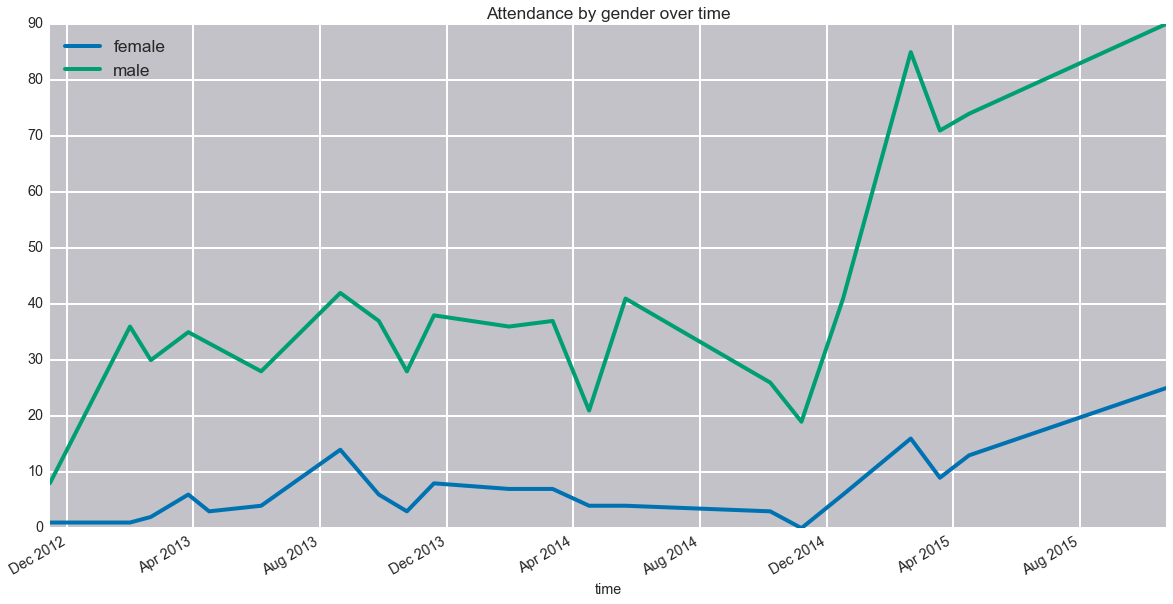

In [33]:
gender_df = events_with_gender_df[['female', 'male']]
gender_df.plot(title='Attendance by gender over time')

This might be easier to interpret by looking at the percentage of females in attendance. We can use the ``div`` (divide) method to calculate this.

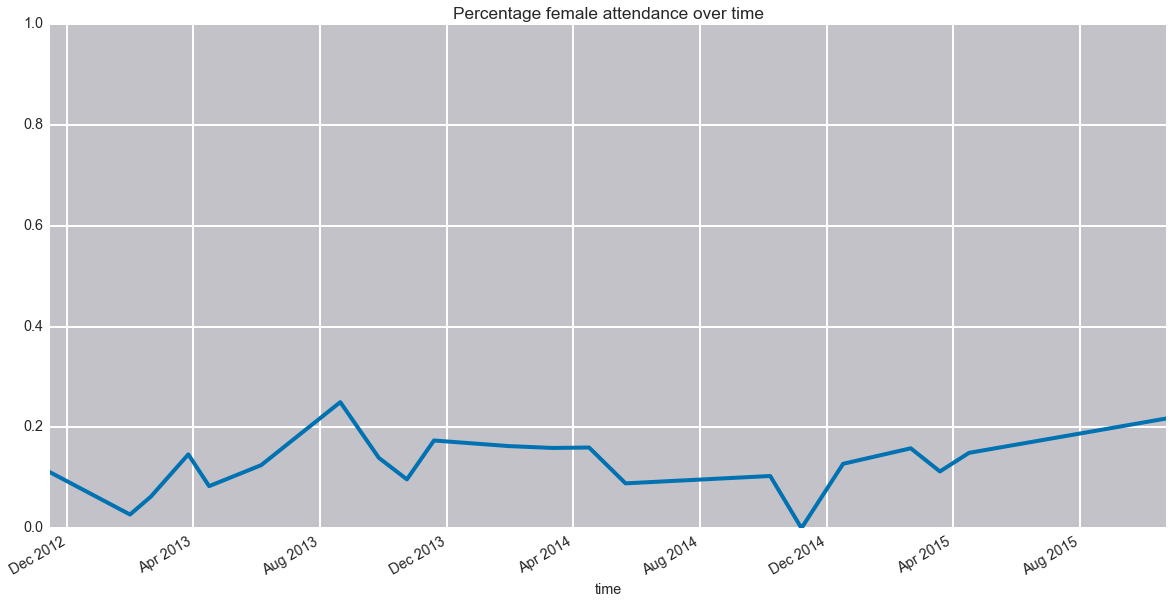

In [34]:
female_ratio = gender_df['female'].div(gender_df['male'] + gender_df['female'])
female_ratio.plot(title='Percentage female attendance over time', ylim=(0.0, 1.0))

The members ``DataFrame`` also has some other interesting stuff in it. Let's take a look at the ``topics`` column.

In [35]:
members_df['topics'].iloc[0]

[{u'id': 254, u'name': u'Poker', u'urlkey': u'poker'},
 {u'id': 21067, u'name': u'Collaboration', u'urlkey': u'collaboration'},
 {u'id': 15167, u'name': u'Cloud Computing', u'urlkey': u'cloud-computing'},
 {u'id': 10333, u'name': u'Parents', u'urlkey': u'parents'},
 {u'id': 553, u'name': u'Dungeons & Dragons', u'urlkey': u'dnd'},
 {u'id': 4377, u'name': u'Politics', u'urlkey': u'politics'},
 {u'id': 15992, u'name': u'Games', u'urlkey': u'games'},
 {u'id': 9696, u'name': u'New Technology', u'urlkey': u'newtech'},
 {u'id': 19585, u'name': u'Board Games', u'urlkey': u'board-games'},
 {u'id': 48471,
  u'name': u'Computer programming',
  u'urlkey': u'computer-programming'},
 {u'id': 19197, u'name': u'Activism', u'urlkey': u'activism'},
 {u'id': 226, u'name': u'Acting', u'urlkey': u'acting'},
 {u'id': 17558, u'name': u'Performing Arts', u'urlkey': u'performing-arts'}]

Let's see if we can identify any trends in member's topics. Let's start off by identifying the most common topics:

In [36]:
from collections import Counter

topic_counter = Counter()
for m in members_df['topics']:
    topic_counter.update([t['name'] for t in m])
topic_counter.most_common(20)

[(u'Big Data', 528),
 (u'Data Analytics', 492),
 (u'Computer programming', 473),
 (u'New Technology', 450),
 (u'Open Source', 381),
 (u'Data Mining', 372),
 (u'Software Development', 366),
 (u'Startup Businesses', 359),
 (u'Technology', 314),
 (u'Python', 285),
 (u'Technology Startups', 278),
 (u'Web Development', 277),
 (u'Entrepreneurship', 265),
 (u'Data Visualization', 264),
 (u'Mobile Technology', 227),
 (u'Big Data Analytics', 210),
 (u'Predictive Analytics', 202),
 (u'Mobile Development', 190),
 (u'Web Design', 182),
 (u'Outdoors', 182)]

Next let's create a new ``DataFrame`` where each column is one of the top 100 topics, and each row is a member. We'll set the values of each cell to be either 0 or 1 to indicate that that member has (or doesn't have) that topic.

In [37]:
top_100_topics = set([t[0] for t in topic_counter.most_common(100)])
topic_member_map = {}
for i, m in members_df.iterrows():
    if m['topics']:
        top_topic_count = {}
        for topic in m['topics']:
            if topic['name'] in top_100_topics:
                top_topic_count[topic['name']] = 1
        topic_member_map[m['anon_id']] = top_topic_count
        
top_topic_df = pd.DataFrame(topic_member_map)
top_topic_df.head(3)

0     2     3     4     5     6     8     9     11    \
20's & 30's Social   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Adventure            NaN   NaN   NaN     1   NaN   NaN   NaN   NaN   NaN   
Art                  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                    12    ...   1261  1262  1264  1266  1267  1268  1269  \
20's & 30's Social   NaN  ...    NaN     1   NaN   NaN   NaN   NaN   NaN   
Adventure            NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Art                  NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                    1271  1272  1273  
20's & 30's Social   NaN   NaN   NaN  
Adventure            NaN   NaN   NaN  
Art                  NaN   NaN   NaN  

[3 rows x 1088 columns]

Okay for what I'm going to do next, I want the rows to be the members and the columns to be the topics. We can use the ``T`` (transpose) method to fix this.

In [38]:
top_topic_df = top_topic_df.T
top_topic_df.head(3)

20's & 30's Social  Adventure  Art  Bicycling  Big Data  \
0                 NaN        NaN  NaN        NaN       NaN   
2                 NaN        NaN  NaN        NaN       NaN   
3                 NaN        NaN  NaN        NaN       NaN   

   Big Data Analytics  Board Games  Book Club  Business Intelligence  \
0                 NaN            1        NaN                    NaN   
2                 NaN          NaN        NaN                    NaN   
3                 NaN          NaN        NaN                    NaN   

   Business Strategy       ...         Watching Movies  Web Design  \
0                NaN       ...                     NaN         NaN   
2                NaN       ...                     NaN           1   
3                NaN       ...                     NaN         NaN   

   Web Development  Web Technology  Wellness  Wine  Women in Technology  \
0              NaN             NaN       NaN   NaN                  NaN   
2                1               1       NaN   NaN                  NaN   
3              NaN             NaN       NaN   NaN                  NaN   

   Writing  Young Professionals  iOS Development  
0      NaN                  NaN              NaN  
2      NaN                  NaN                1  
3      NaN                  NaN              NaN  

[3 rows x 100 columns]

Next we can use the ``fillna`` method to fill in the missing values with zeros.

In [39]:
top_topic_df.fillna(0, inplace=True)
top_topic_df.head(3)

20's & 30's Social  Adventure  Art  Bicycling  Big Data  \
0                   0          0    0          0         0   
2                   0          0    0          0         0   
3                   0          0    0          0         0   

   Big Data Analytics  Board Games  Book Club  Business Intelligence  \
0                   0            1          0                      0   
2                   0            0          0                      0   
3                   0            0          0                      0   

   Business Strategy       ...         Watching Movies  Web Design  \
0                  0       ...                       0           0   
2                  0       ...                       0           1   
3                  0       ...                       0           0   

   Web Development  Web Technology  Wellness  Wine  Women in Technology  \
0                0               0         0     0                    0   
2                1               1         0     0                    0   
3                0               0         0     0                    0   

   Writing  Young Professionals  iOS Development  
0        0                    0                0  
2        0                    0                1  
3        0                    0                0  

[3 rows x 100 columns]

Next let's use a [clustering algorithm](https://en.wikipedia.org/wiki/Cluster_analysis) to see if there are any patterns in the topics members are interested in. A clustering algorithm groups a set of data points so that similar objects are in the same group. This is a classic type of [unsupervised machine learning](https://en.wikipedia.org/wiki/Unsupervised_learning). Below you can find visualisations of how different clustering algorithms perform on various kinds of data:

<img src="plot_cluster_comparison_001.png" width="90%" />

[Kmeans clustering](http://scikit-learn.org/stable/modules/clustering.html#k-means) is quick and can scale well to larger datasets. Let's see how it performs on our dataset:

# scikit-learn
<img src="scikit-learn-logo-notext.png" width="20%" />

We'll use a python machine learning library called scikit-learn to do the clustering.

In [40]:
from sklearn.cluster import MiniBatchKMeans as KMeans
X = top_topic_df.as_matrix()
n_clusters = 3
k_means = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10, random_state=47)
k_means.fit(X)
k_means.labels_

array([2, 1, 2, ..., 2, 0, 2], dtype=int32)

We've grouped our members into 3 clusters, let's see how many members are in each cluster

In [41]:
Counter(list(k_means.labels_)).most_common()

[(2, 637), (1, 293), (0, 158)]

Next let's see which topics are most popular in each cluster:

In [42]:
from collections import defaultdict

cluster_index_map = defaultdict(list)
for i in range(k_means.labels_.shape[0]):
    cluster_index_map[k_means.labels_[i]].append(top_topic_df.index[i])

for cluster_num in range(n_clusters):
    print 'Cluster {}'.format(cluster_num)
    f = top_topic_df[top_topic_df.index.isin(cluster_index_map[cluster_num])].sum()
    f2 = f[f > 0]
    f3 = f2.sort_values(ascending=False)
    print f3[:10]
    print

Cluster 0
Outdoors                   104
Live Music                  98
Dining Out                  93
Hiking                      86
Fitness                     84
Travel                      77
Watching Movies             60
Adventure                   58
New Technology              57
Intellectual Discussion     54
dtype: float64

Cluster 1
Computer programming    248
Open Source             236
New Technology          231
Software Development    231
Technology              214
Web Development         211
Big Data                190
Startup Businesses      177
Data Analytics          166
Mobile Technology       158
dtype: float64

Cluster 2
Big Data                291
Data Analytics          286
Data Mining             201
Computer programming    171
New Technology          162
Data Visualization      148
Startup Businesses      130
Python                  130
Open Source             123
Big Data Analytics      115
dtype: float64



So it looks like our biggest cluster (#2) contains members whose primary interest is data science.

The second biggest cluster (#1) contains members whose primary interests are technology, and data science just happens to be one of those interests.

The smallest cluster (#0) contains members whose primary interests are around socializing.

Based on this information we might be able to engage members in the "social" (#0) cluster by having more socially oriented events. We might be able to engaged with the members in cluster (#1) by having more events geared toward beginners.

# Conclusion
Hopefully you learned a little bit about DataPhilly and doing exploratory analysis in Python. There's tons of extra data in our datasets that I don't even have time to get into today. If you feel like you missed anything and would like to revist it, you can find this Notebook and instructions for how to use it in my github repo [http://github.com/mdbecker/](http://github.com/mdbecker/). If you find something interesting in the data and you'd like to share it with me I'm [@beckerfuffle](https://twitter.com/beckerfuffle) on Twitter, and you can always [contact me](http://goo.gl/RvxB6J) through the DataPhilly Meetup page.